<a href="https://colab.research.google.com/github/Dhruv-Sabharwal/CNN_Characters/blob/master/CNN_Characters_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Some parts of this code have been taken from my IML project
import keras
from keras import models
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.utils import to_categorical
import skimage
import skimage.data
import skimage.transform
from skimage import io
from skimage import color
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import os
import random
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import itertools   #Delete this

In [66]:
# Reading the data directory from repository on github.
%matplotlib inline
!git clone -l -s https://github.com/Dhruv-Sabharwal/CNN_Characters.git data
%cd data/Img
!ls

Cloning into 'data'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 25036 (delta 8), reused 0 (delta 0), pack-reused 25006
Receiving objects: 100% (25036/25036), 128.85 MiB | 13.55 MiB/s, done.
Resolving deltas: 100% (10/10), done.
/content/data/Img/data/Img
BadImag  GoodImg


# **Question 1 (a)**

In [67]:
def data_loader(data_dir): 
    #There are several subdirectories in the data directory. We read all these subdirectories into subdirs[]. There are 62 subdirectories-> (0-9,A-Z,a-z).
    subdirs = []
    for i in os.listdir(data_dir):
      subdirs.append(i)

    #Data is now collected into four lists - train_labels, test_labels, train_images and test_images.

    train_labels = []
    test_labels = []
    train_images = []
    test_images = []

    for i in subdirs:
        label_dir = data_dir + i
        f_names=[]   #list to store all the image names
        for f in os.listdir(label_dir):
          if f.endswith(".png"):   # only files that end in .png are image files
            f_names.append(label_dir + '/' + f)

        #For each label, add 80% of its images into train_images[] and 20% of its images into test_images[]. Do the same for the labels.

        f_names_train=f_names[:int(0.8*len(f_names))]
        f_names_test=f_names[int(0.8*len(f_names)):]

        for f in f_names_train:
            train_images.append(skimage.io.imread(f))   
            train_labels.append(i)
        for f in f_names_test:
            test_images.append(skimage.io.imread(f))
            test_labels.append(i)
    return train_labels, train_images, test_labels, test_images

# Loading the training and testing dataset using data_loader().
BadImg_data_dir = "BadImag/Bmp/"
GoodImg_data_dir = "GoodImg/Bmp/"

BadImg_train_labels, BadImg_train_images, BadImg_test_labels, BadImg_test_images = data_loader(BadImg_data_dir)
GoodImg_train_labels, GoodImg_train_images, GoodImg_test_labels, GoodImg_test_images = data_loader(GoodImg_data_dir)
train_labels=BadImg_train_labels+GoodImg_train_labels
train_images=BadImg_train_images+GoodImg_train_images
test_labels=BadImg_test_labels+GoodImg_test_labels
test_images=BadImg_test_images+GoodImg_test_images
print(len(train_labels))
print(len(train_images))
print(len(test_labels))
print(len(test_images))

9950
9950
2548
2548


In [0]:
def reshape_and_grayscale(images): 
  #Reshaping the images to 32x32 px and converting them into grayscale

  reshaped_images=[]
  for i in images:
    reshaped_images.append(skimage.transform.resize(i,(32,32), mode ='constant'))
  reshaped_images= np.array(reshaped_images) #Keras requires our images and labels to be in numpy arrays
  #print(reshaped_images.shape)

  #Converting RGB reshaped images to grayscale images
  grayscaled_images=[]
  for i in reshaped_images:
    grayscaled_images.append(color.rgb2gray(i))   
  grayscaled_images= np.array(grayscaled_images)  #Keras requires our images and labels to be in numpy arrays

  #print("Grayscaled Images")
  #print(grayscaled_images[0].shape,"\n")

  expanded_imgs = grayscaled_images[:, :, :, np.newaxis]  #converting images from 32x32 to 32x32x1 
  grayscaled_images=expanded_imgs

  #print(grayscaled_images.shape)
  return grayscaled_images

X_train=reshape_and_grayscale(train_images)
X_test=reshape_and_grayscale(test_images)

In [0]:
#converting labels from str 'Sample050' to integer 50
for i in range(len(train_labels)):
  train_labels[i]=int(train_labels[i][6:])
#print(train_labels)

for i in range(len(test_labels)):
  test_labels[i]=int(test_labels[i][6:])
#print(test_labels)

In [0]:
#one-hot encoding
Y_train = to_categorical(train_labels)
Y_test = to_categorical(test_labels)

In [0]:
#Shuffling the data
shuff_train = list(zip(X_train, Y_train))
random.shuffle(shuff_train)
X_train, Y_train = zip(*shuff_train)
X_train=np.array(X_train)
Y_train=np.array(Y_train)

shuff_test = list(zip(X_test, Y_test))
random.shuffle(shuff_test)
X_test, Y_test = zip(*shuff_test)
X_test=np.array(X_test)
Y_test=np.array(Y_test)

In [0]:
#Defining the CNN
model_gen = Sequential()
model_gen.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=X_train[0].shape))  #We provide input_shape as this is the first layer in the CNN
#model_gen.add(MaxPooling2D(pool_size=(2, 2)))
#model_gen.add(Dropout(0.25))
 
model_gen.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
model_gen.add(MaxPooling2D(pool_size=(2, 2)))
model_gen.add(Dropout(0.25))
 
model_gen.add(Conv2D(128, kernel_size=(7, 7), strides=(1, 1), padding='same', activation='relu'))
model_gen.add(MaxPooling2D(pool_size=(2, 2)))
model_gen.add(Dropout(0.25))

model_gen.add(Conv2D(128, kernel_size=(9, 9), strides=(1, 1), padding='same', activation='relu'))
#model_gen.add(MaxPooling2D(pool_size=(2, 2)))
#model_gen.add(Dropout(0.25))

model_gen.add(Flatten())
model_gen.add(Dense(256, activation='relu'))

model_gen.add(Dense(63, activation='softmax'))

In [0]:
#Compiling the CNN
model_gen.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Creating checkpoint to store the best model based on validation accuracy
from keras.callbacks import ModelCheckpoint
filepath="/content/drive/My Drive/OCR_CNN/Best_Weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [76]:
#Training the model
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=False,
    rotation_range=12,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False)

datagen.fit(X_train)

%time
epochs=50
batch_size = 20
history_generator = model_gen.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    epochs=epochs, steps_per_epoch=500 , callbacks=callbacks_list, verbose=1,
                    validation_data=(X_test, Y_test))

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.44 µs
Epoch 1/50
500/500 [==============================] - 6s 12ms/step - loss: 3.3744 - acc: 0.1749 - val_loss: 2.3658 - val_acc: 0.4015

Epoch 00001: val_acc improved from -inf to 0.40149, saving model to /content/drive/My Drive/OCR_CNN/Best_Weights.hdf5
Epoch 2/50
500/500 [==============================] - 5s 10ms/step - loss: 2.0134 - acc: 0.4674 - val_loss: 1.3976 - val_acc: 0.6173

Epoch 00002: val_acc improved from 0.40149 to 0.61735, saving model to /content/drive/My Drive/OCR_CNN/Best_Weights.hdf5
Epoch 3/50
500/500 [==============================] - 5s 10ms/step - loss: 1.5448 - acc: 0.5714 - val_loss: 1.2173 - val_acc: 0.6538

Epoch 00003: val_acc improved from 0.61735 to 0.65385, saving model to /content/drive/My Drive/OCR_CNN/Best_Weights.hdf5
Epoch 4/50
500/500 [==============================] - 5s 10ms/step - loss: 1.3379 - acc: 0.6216 - val_loss: 1.2251 - val_acc: 0.6652

Epoch 00004: val_acc improved from 0

In [0]:
#Loading Best Weights
model_gen.load_weights("/content/drive/My Drive/OCR_CNN/Best_Weights.hdf5")
#Saving Best Model
model_gen.save("/content/drive/My Drive/OCR_CNN/Best_Model.h5")

In [78]:
#Predicting Characters
Y_test_pred = model_gen.predict_classes(X_test, batch_size=batch_size, verbose =1)
pred_value=730  #Predict character for this image
print(Y_test_pred[pred_value])
print(Y_test[pred_value])

2548/2548 [==============================] - 0s 183us/step
29
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [79]:
#Finding Loss and Accuracy
scores = model_gen.evaluate(X_test, Y_test)
print("Testing Loss: ",scores[0])
print("Testing Accuracy: ",scores[1])

2548/2548 [==============================] - 0s 91us/step
Testing Loss:  0.7901512562199328
Testing Accuracy:  0.802982731647731


# **Question 1 (b)**

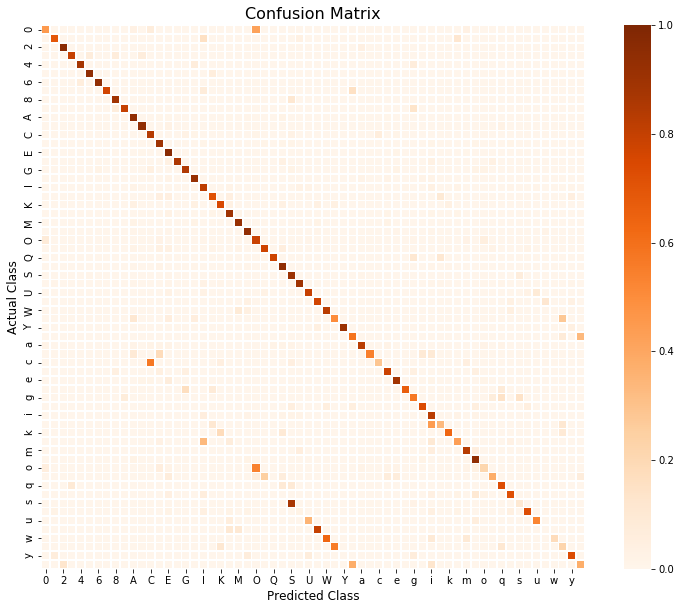

In [80]:
#Confusion Matrix
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (14,10)):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=False, fmt=".2f", linewidths=.7, square = True, cmap = 'Oranges', vmin=0, vmax=1)
    #heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    #heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    plt.ylabel('Actual Class',size=12)
    plt.xlabel('Predicted Class',size=12)
    plt.title('Confusion Matrix', size = 16)

Y_test_classes = [np.argmax(y, axis=None, out=None) for y in Y_test]  #Reversing one-hot encoding
cm=confusion_matrix(Y_test_classes,Y_test_pred)  #Creating Confusion Matrix

cm_test = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  #Normalizing the confusion matrix

acc_score_test = accuracy_score(Y_test_classes, Y_test_pred)

class_names=[]
for i in range(10):
  class_names.append(str(i))
for i in range(65,91):
  class_names.append(chr(i))
for i in range(97,123):
  class_names.append(chr(i))

print_confusion_matrix(cm_test,class_names)

In the above confusion matrix (heat map), we see that most of the cells on the diagonal are dark in colour (indicating that these classes are being predicted with high accuracy). There are however some cells which are not on the diagonal and are still dark. These are mostly due to confusion between similar looking characters - S and s, V and v, O and o and 0, etc. Hence we are getting false positives for capital letters (S,V,O etc.) when the letters are in lower case actually.

# **Question 1 (c)**

In [81]:
model_gen.summary()  #Generating a summary of the different layers used in the CNN

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 64)        51264     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 128)       401536    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 8, 8, 128)        

In [0]:
layer_outputs = [layer.output for layer in model_gen.layers[:11]] # Extracts the outputs of the 11 layers in our model
activation_model = models.Model(inputs=model_gen.input, outputs=layer_outputs) # Creates a model that will return the outputs of the different layers, given the model input

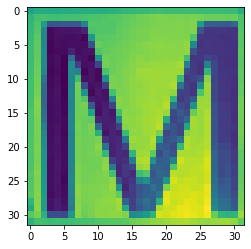

(1, 32, 32, 1)


In [83]:
#Taking a sample image on which we will calculate the activations
sample_image = skimage.io.imread("GoodImg/Bmp/Sample023/img023-00059.png")
sample_image = skimage.transform.resize(sample_image,(32,32), mode ='constant')
sample_image = color.rgb2gray(sample_image)
plt.imshow(sample_image)
plt.show()

sample_image = sample_image[ :, :, np.newaxis]  #converting image from 32x32 to 32x32x1
sample_image = np.expand_dims(sample_image, axis = 0)  #We need to add 1 as the first dimension in this image so that we can send it as input into the layers of the CNN. The first dimension needs to be 1 here to signify that there is only 1 input image.
print(sample_image.shape)

In [84]:
#Calculating Activations
activations = activation_model.predict(sample_image)
first_layer_activation = activations[0]  #First convolutional layer
print(first_layer_activation.shape)

(1, 32, 32, 32)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


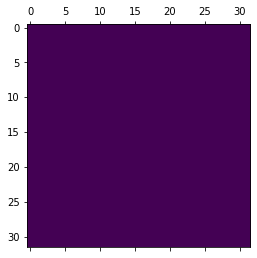

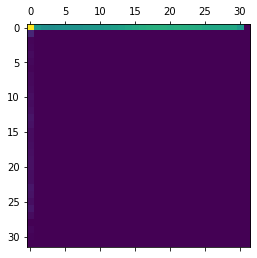

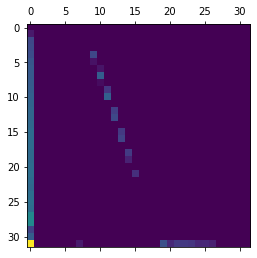

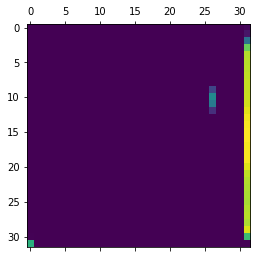

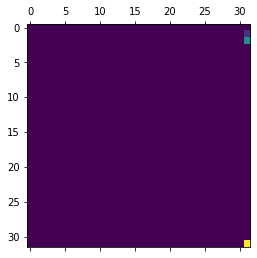

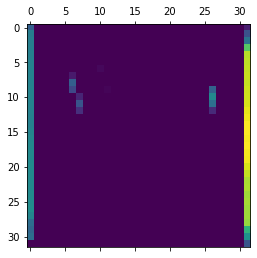

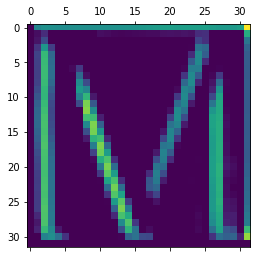

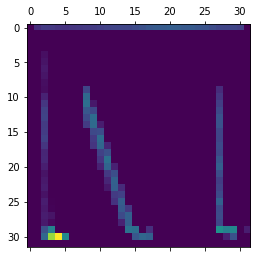

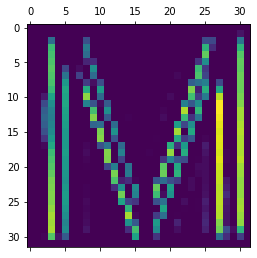

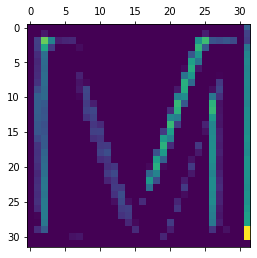

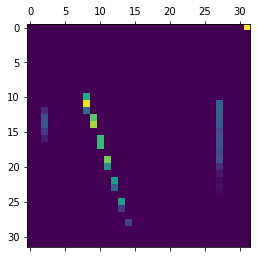

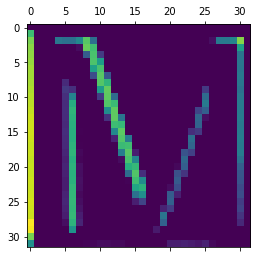

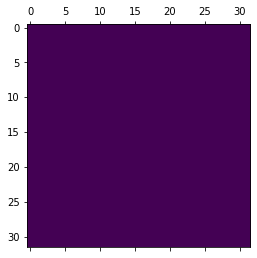

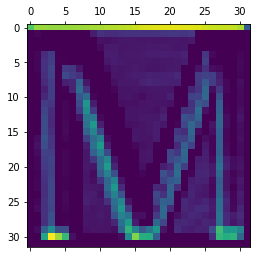

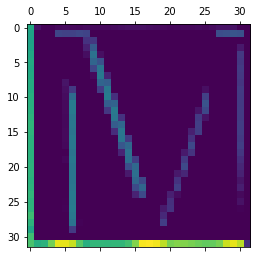

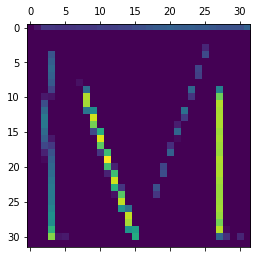

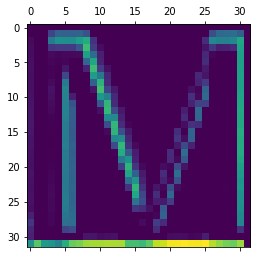

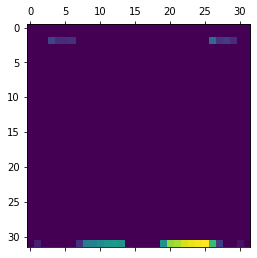

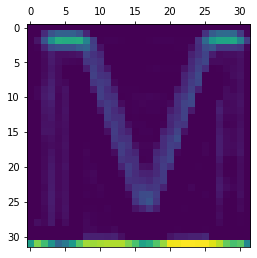

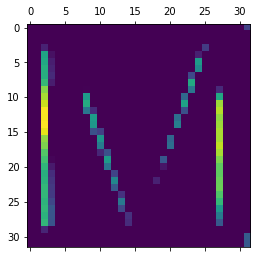

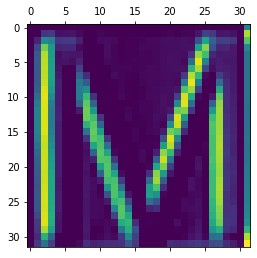

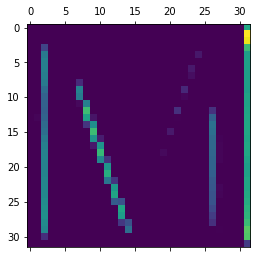

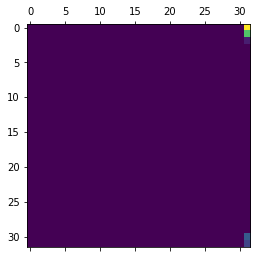

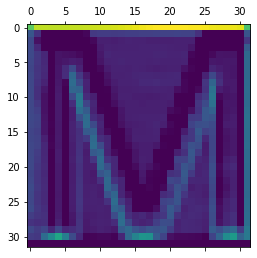

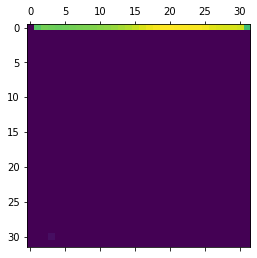

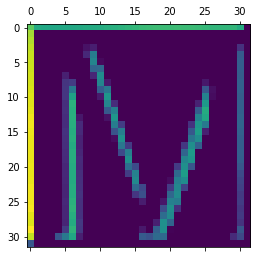

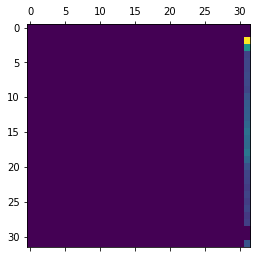

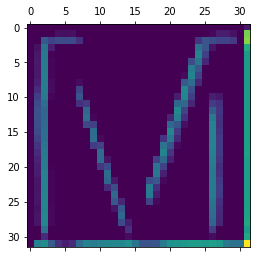

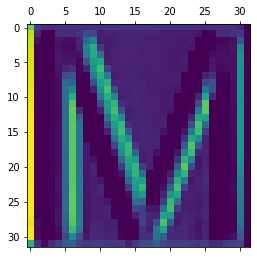

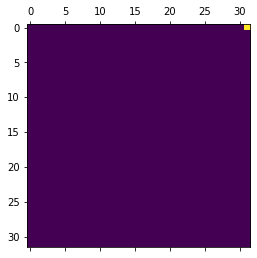

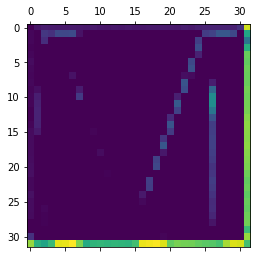

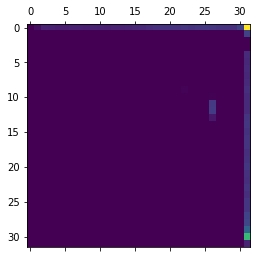

In [85]:
#Display all the feature maps of the first convolutional layer
for i in range(32):
  plt.matshow(first_layer_activation[0, :, :, i], cmap='viridis')

The first layer retains the full shape of the character. We see that the edges of the character are getting activated (brighter part), indicating that the first layer is trying to extract the edges from the character. However, there are some filters which are non activated and are left blank. In the first layer, the activations retain almost all of the information present in the initial picture.

# **Question 1 (d)**

(1, 8, 8, 128)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


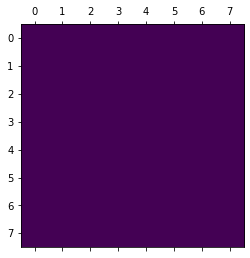

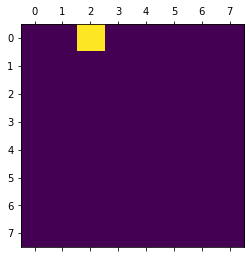

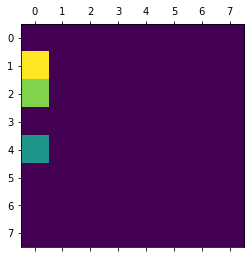

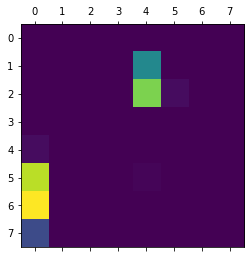

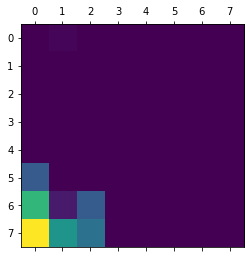

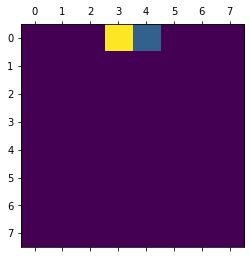

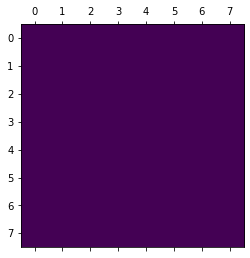

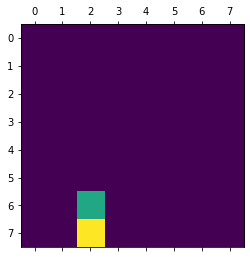

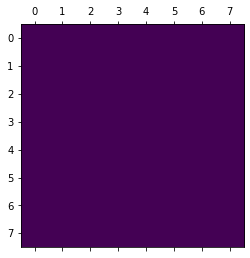

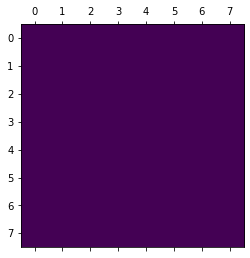

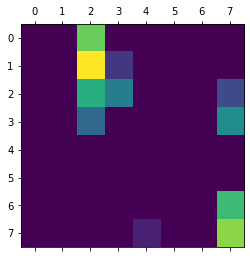

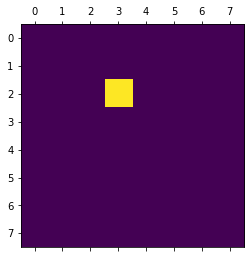

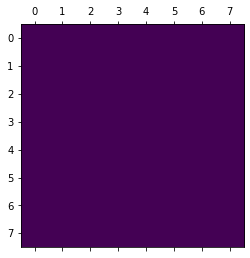

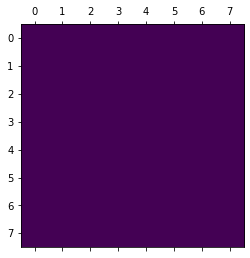

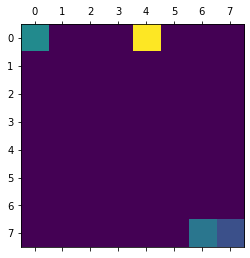

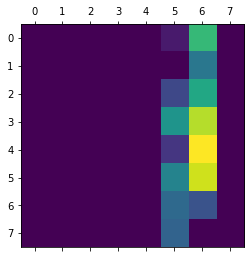

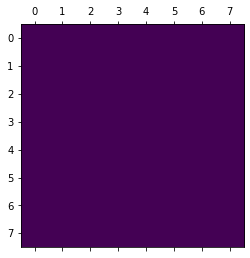

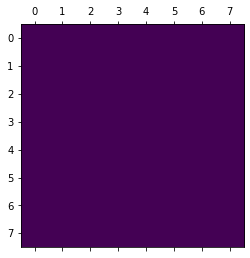

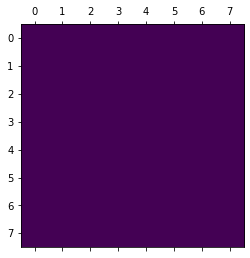

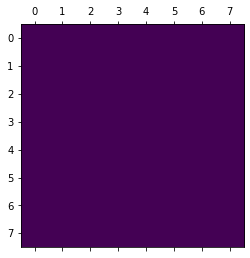

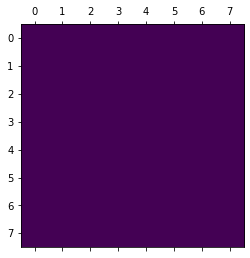

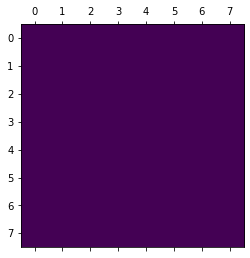

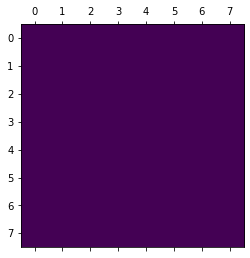

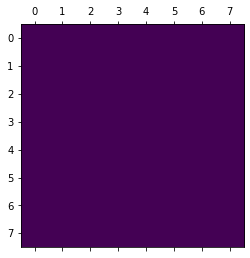

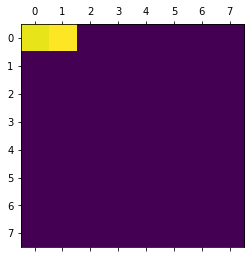

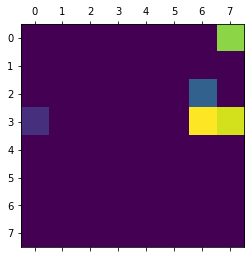

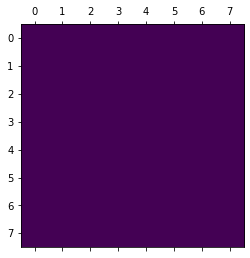

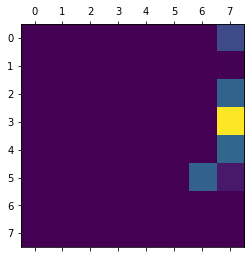

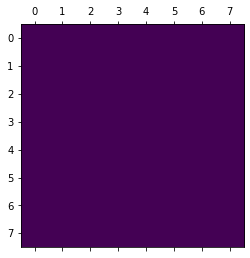

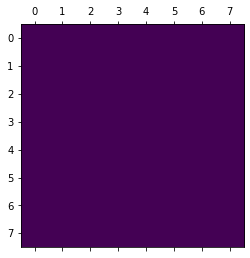

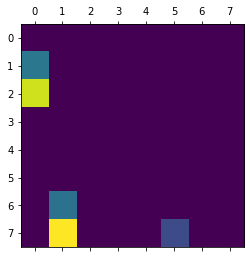

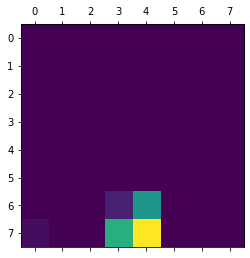

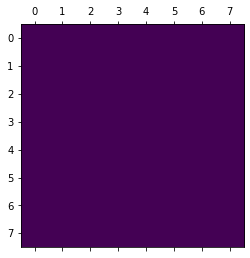

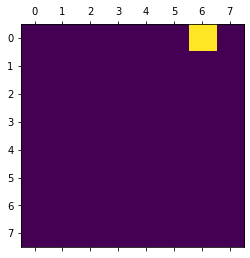

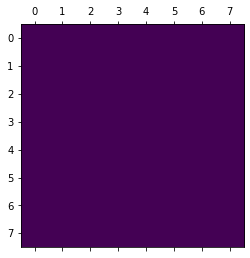

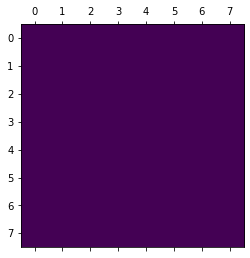

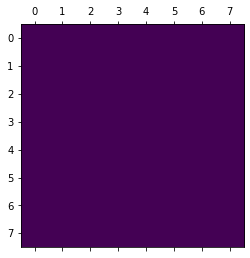

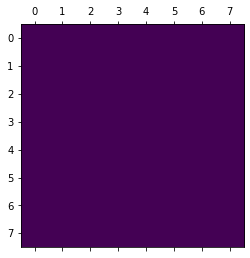

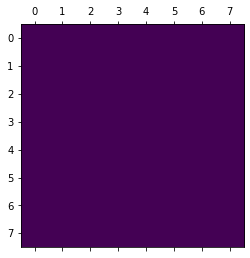

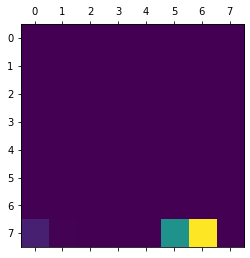

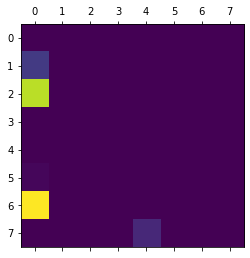

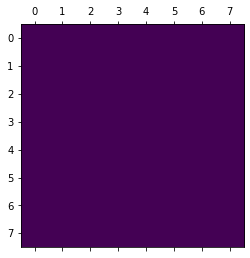

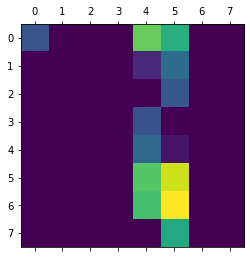

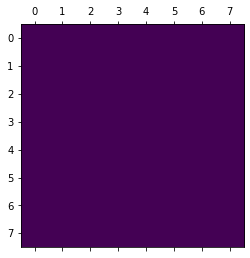

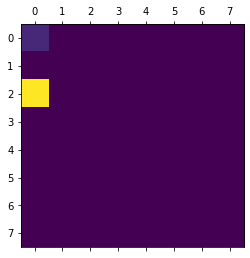

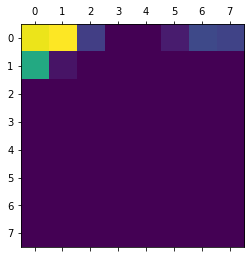

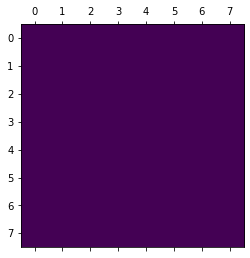

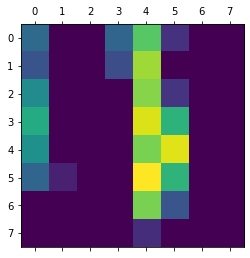

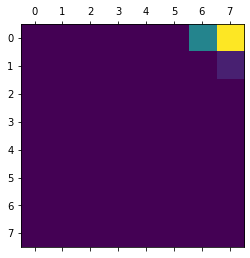

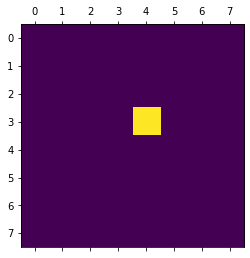

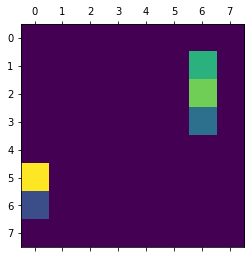

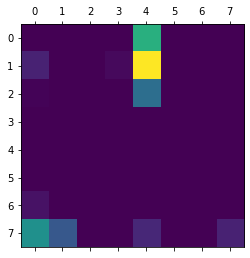

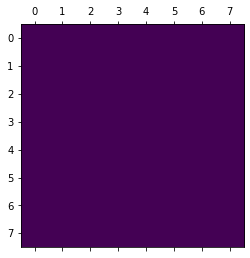

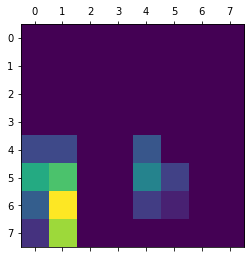

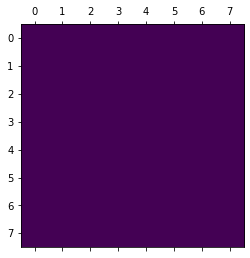

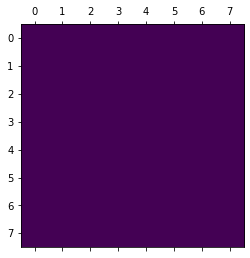

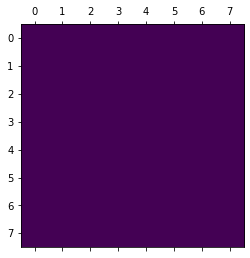

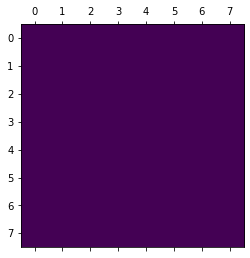

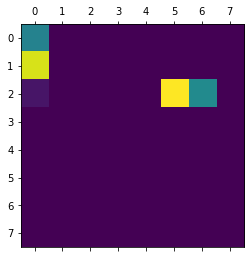

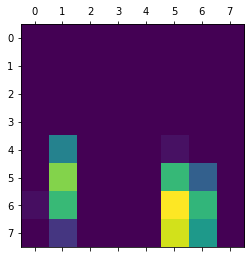

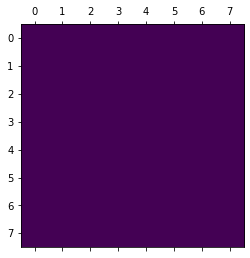

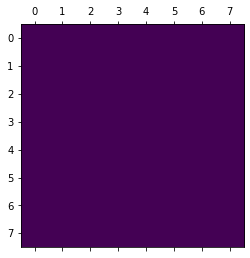

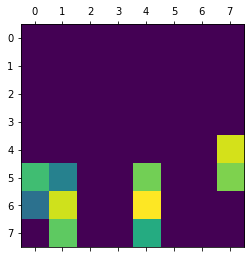

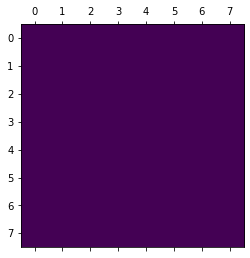

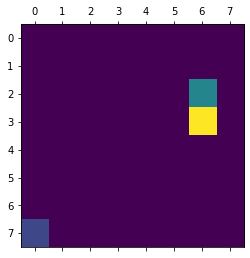

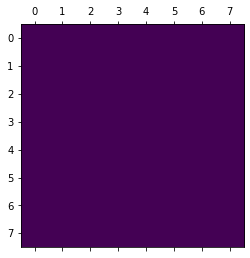

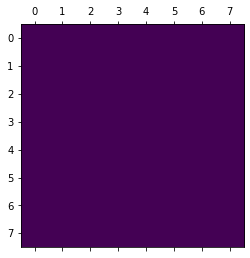

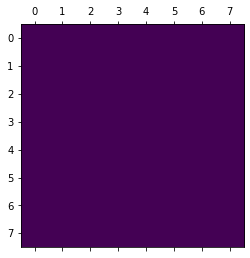

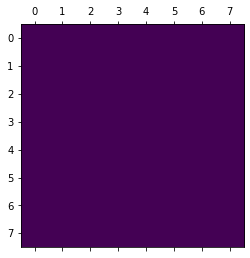

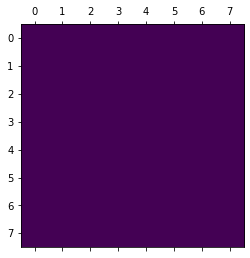

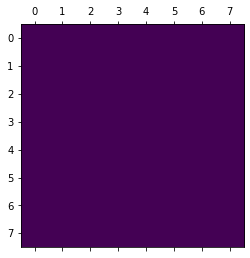

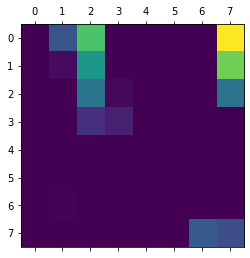

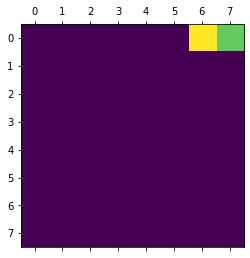

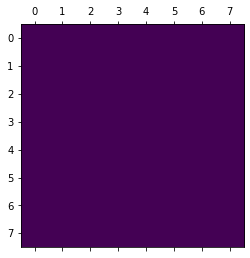

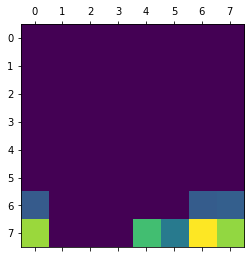

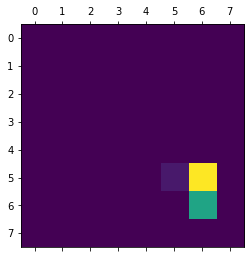

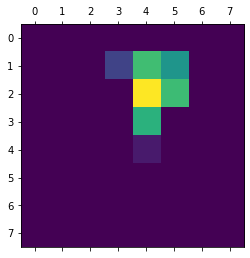

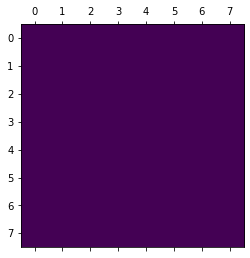

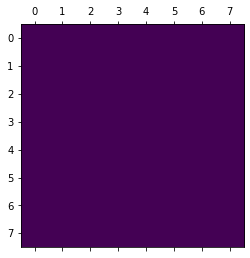

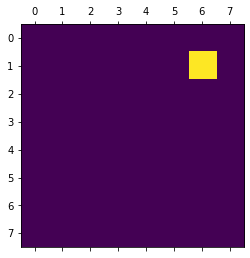

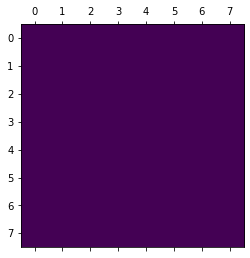

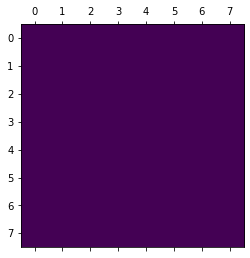

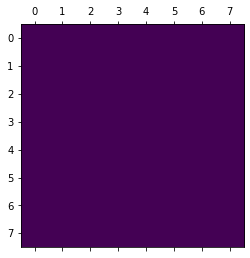

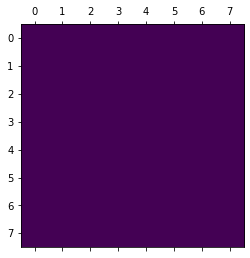

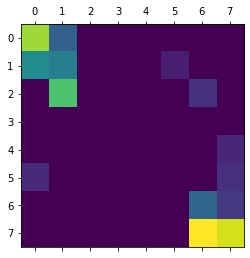

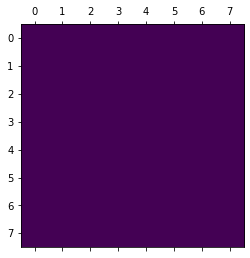

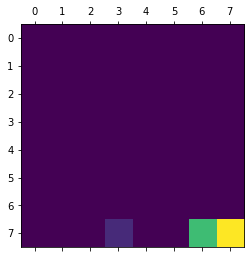

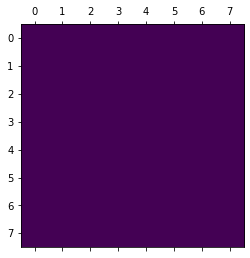

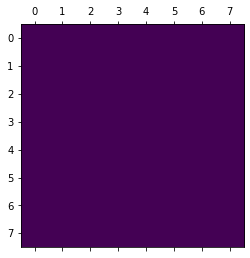

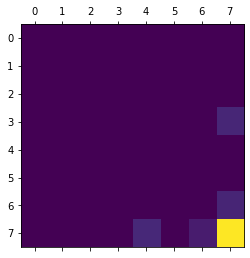

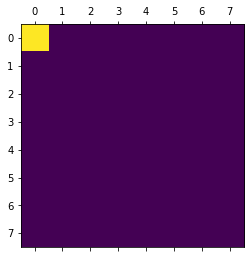

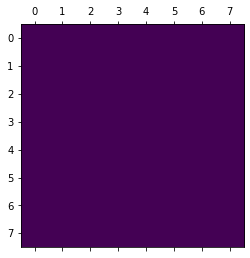

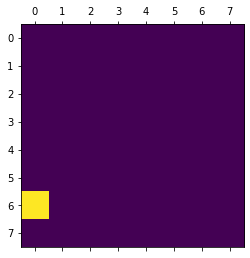

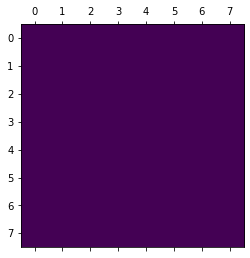

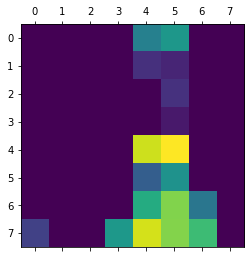

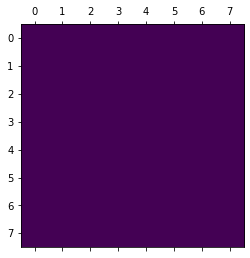

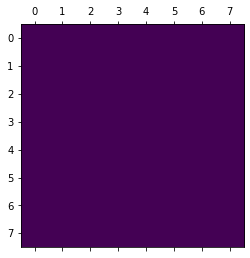

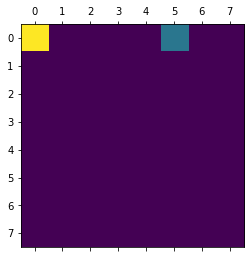

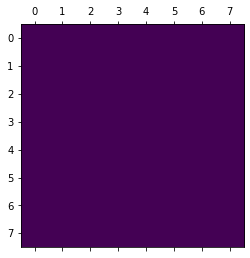

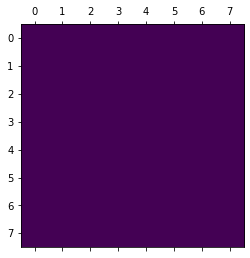

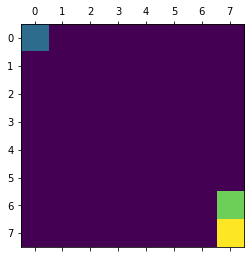

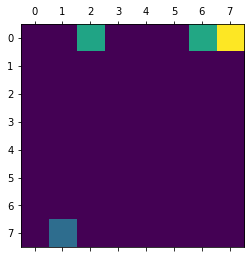

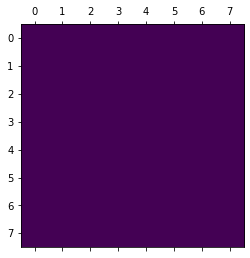

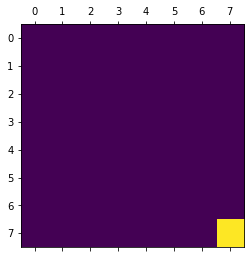

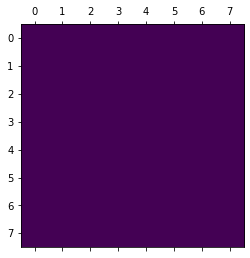

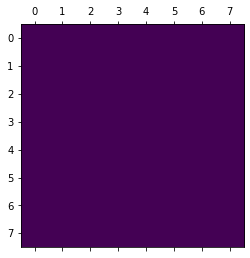

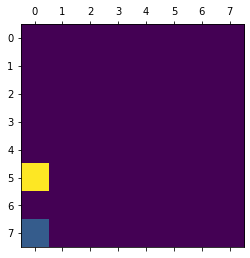

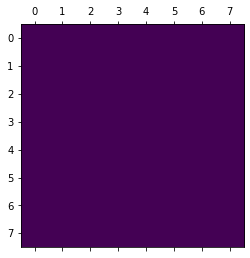

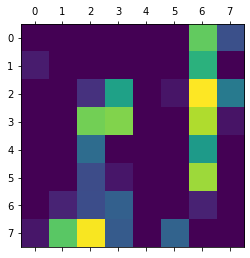

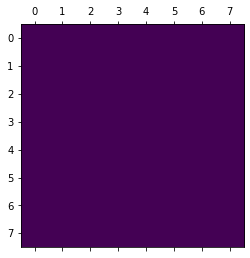

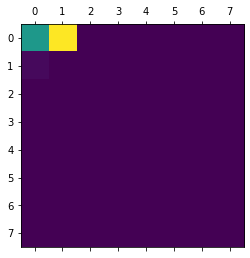

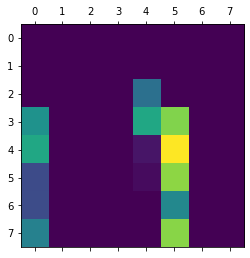

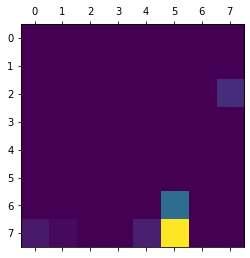

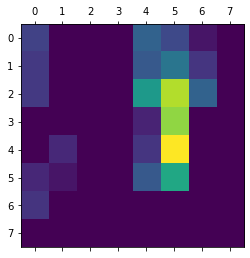

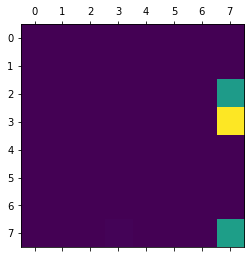

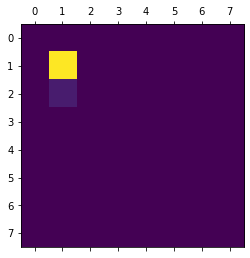

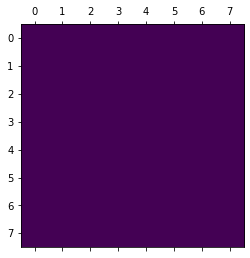

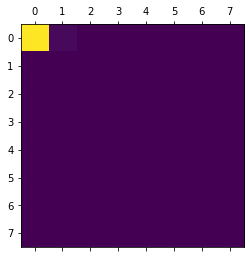

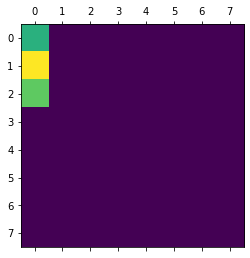

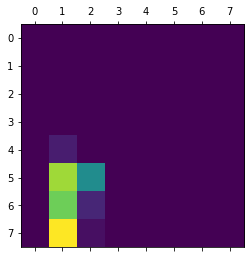

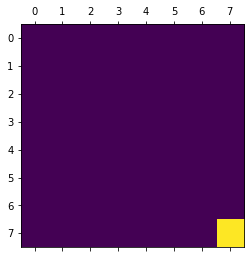

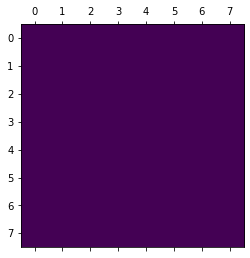

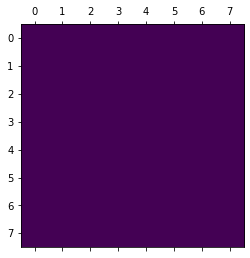

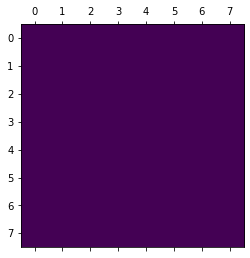

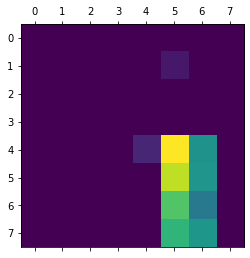

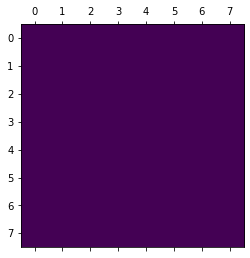

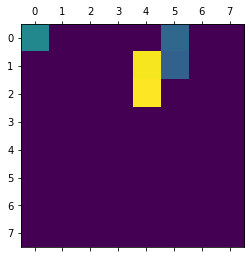

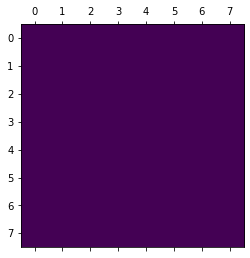

In [86]:
last_layer_activation = activations[7]   #Last convolutional layer
print(last_layer_activation.shape)
#Display all the feature maps of the last convolutional layer
for i in range(128):
  plt.matshow(last_layer_activation[0, :, :, i], cmap='viridis')

In the last convolutional layer the activations become less visually interpretable and highly abstract. Many of the filters are blank i.e. they haven't been activated, indicating that there is nothing more to learn at this point. The filters of this layer retain less information about the visual content of the image and more information about the class to which the image belongs. The features that are detected by the earlier layers i.e. edges are being combined by the deeper layers to gain knowledge about curves, corners and angles. 

# **Question 2**

Stride controls by how much the filter kernel slides over the input pixels. We use smaller stride when we feel that neighboring pixels are highly correlated, especially in lower layers. Small stride values also help us in learning as much information as possible and is a better choice if we want to capture the finer details in the image. We increase the stride when we want receptive fields to overlap less and when we want to reduce the spatial dimension of the images. Stride is mostly increased towards the deeper layers of the network as these layers try to capture characteristics particular to the different classes. The deeper layers try to combine local features (ex. edges) to make global features (ex. curves/corners). For this they need to see the bigger picture and not just the correlation between neighboring pixels.